In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from pandas import Series, DataFrame
import scipy

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
import ibm_boto3
from ibm_botocore.client import Config
import os
import json
import warnings
import time

In [4]:
#cos config
cos_credentials = {
  "apikey": "eUU7ks-YstaFkkEjoIVEsUkvU2_mUq-tcwfyQamY6kim",
  "cos_hmac_keys": {
    "access_key_id": "f1ac76f0074244f9a07d5debb286f122",
    "secret_access_key": "c623bb131af41897c674eec7f7700446fdbeecf6c993d105"
  },
  "endpoints": "https://cos-service.bluemix.net/endpoints",
  "iam_apikey_description": "Auto generated apikey during resource-key operation for Instance - crn:v1:bluemix:public:cloud-object-storage:global:a/4171c5a3fdf4490ba445218f5bcdea3a:ddbf4da0-34e3-4055-aba2-6b23b0b2b78b::",
  "iam_apikey_name": "auto-generated-apikey-f1ac76f0-0742-44f9-a07d-5debb286f122",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/4171c5a3fdf4490ba445218f5bcdea3a::serviceid:ServiceId-ed5194dd-dab1-411b-b53c-df5f95c3d594",
  "resource_instance_id": "crn:v1:bluemix:public:cloud-object-storage:global:a/4171c5a3fdf4490ba445218f5bcdea3a:ddbf4da0-34e3-4055-aba2-6b23b0b2b78b::"
}

api_key = cos_credentials['apikey']
service_instance_id = cos_credentials['resource_instance_id']

In [5]:
service_endpoint = 'https://s3-api.us-geo.objectstorage.softlayer.net'
auth_endpoint = 'https://iam.bluemix.net/oidc/token'

In [6]:
cos = ibm_boto3.resource ('s3',
                         ibm_api_key_id=api_key,
                         ibm_service_instance_id=service_instance_id,
                         ibm_auth_endpoint=auth_endpoint,
                         config=Config(signature_version='oauth'),
                         endpoint_url=service_endpoint)

In [7]:
#get bucket or create anew bucket
buckets = ['wktest3', 'wktest4']
for bucket in buckets:
    if not cos.Bucket(bucket) in cos.buckets.all():
        print('Creating bucket "{}"...'.format(bucket))
        try:
            cos.create_bucket(Bucket=bucket)
        except ibm_boto3.exceptions.ibm_botocore.client.ClientError as e:
            print('Error: {}.'.format(e.response['Error']['Message']))

In [8]:
#show all buckets
print(list(cos.buckets.all()))

[s3.Bucket(name='newproject-donotdelete-pr-fv0nfbh7kpcho3'), s3.Bucket(name='wktest1'), s3.Bucket(name='wktest2'), s3.Bucket(name='wktest3'), s3.Bucket(name='wktest4')]


In [9]:
!rm Kmeans_w_t.csv

In [10]:
!rm water-tilt.csv

In [11]:
!rm master.zip
!rm -r wktest-master/

rm: cannot remove ‘master.zip’: No such file or directory
rm: cannot remove ‘wktest-master/’: No such file or directory


In [12]:
#download file from the cos bucket
bucket_name = buckets[0]
bucket_obj = cos.Bucket(bucket_name)
bucket_obj.download_file('Kmeans_w_t.csv', './Kmeans_w_t.csv')

In [13]:
#download file from github
!wget https://github.com/wk821917/wktest/archive/master.zip

--2018-07-26 06:30:34--  https://github.com/wk821917/wktest/archive/master.zip
Resolving github.com (github.com)... 192.30.253.113, 192.30.253.112
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/wk821917/wktest/zip/master [following]
--2018-07-26 06:30:35--  https://codeload.github.com/wk821917/wktest/zip/master
Resolving codeload.github.com (codeload.github.com)... 192.30.253.121, 192.30.253.120
Connecting to codeload.github.com (codeload.github.com)|192.30.253.121|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 720411 (704K) [application/zip]
Saving to: ‘master.zip’

100%[======================================>] 720,411     3.75MB/s   in 0.2s   

2018-07-26 06:30:35 (3.75 MB/s) - ‘master.zip’ saved [720411/720411]



In [14]:
!unzip master.zip

Archive:  master.zip
32b8d54e67d7c94080836293916a3c9a539ffc14
   creating: wktest-master/
  inflating: wktest-master/IBM_ML_KMeans_Test.ipynb  
  inflating: wktest-master/ML_KMeans.py  
  inflating: wktest-master/MY_IBM_TEST_3__r1ge3tK7X.ipynb  
 extracting: wktest-master/README.md  
  inflating: wktest-master/actdata.csv  
  inflating: wktest-master/lstmtest.py  
  inflating: wktest-master/water-tilt.csv  


In [15]:
!ls

Kmeans_w_t.csv	master.zip  wktest-master


In [16]:
data_ready = pd.read_csv('./Kmeans_w_t.csv')

In [17]:
#transform the dataset
data_ready = data_ready.iloc[:,1:]

In [18]:
del data_ready['kind']

In [19]:
data_ready

,xtilt,ytilt,calcu,level
0,-5.378614,-1.251834,30.496578,4.0
1,-5.378447,-1.253432,30.498779,4.0
2,-5.358685,-1.255891,30.292764,5.0
3,-5.361903,-1.255081,30.325230,5.0
4,-5.362575,-1.254008,30.329744,5.0
5,-5.361732,-1.255367,30.324112,5.0
6,-5.360670,-1.252035,30.304377,5.0
7,-5.360808,-1.252628,30.307335,5.0
8,-5.360177,-1.253056,30.301641,5.0
9,-5.360159,-1.253719,30.303113,5.0


In [20]:
data = pd.read_csv('./wktest-master/water-tilt.csv')

In [21]:
data = data.iloc[5000:,-2:]

In [22]:
data['calcu'] = data.iloc[:,0]**2 + data.iloc[:,1]**2

In [23]:
data_unknow_test = data.iloc[5000:,:]

In [24]:
data_unknow_test

,xtilt,ytilt,calcu
10000,-5.378615,-1.201125,30.372196
10001,-5.390418,-1.200592,30.498024
10002,-5.378462,-1.201986,30.372625
10003,-5.390739,-1.201343,30.503290
10004,-5.390945,-1.200440,30.503345
10005,-5.379834,-1.201380,30.385926
10006,-5.379769,-1.201921,30.386533
10007,-5.379009,-1.202047,30.378655
10008,-5.390871,-1.201765,30.505728
10009,-5.378511,-1.213675,30.401389


In [25]:
x_train = data_ready.iloc[:4000,:-1]
y_train = data_ready.iloc[:4000,-1]
x_test = data_ready.iloc[4000:,:-1]
y_test = data_ready.iloc[4000:,-1]

In [26]:
#classifier use knn
num = 5
knn = KNeighborsClassifier(n_neighbors=num)
knn.fit(x_train,y_train)
result_knn = knn.predict(x_test)
(np.array(y_test)==result_knn).shape
(np.array(y_test)==result_knn)
accuracy_score(y_test,result_knn)

1.0

In [32]:
#classifier with naivebayes-gaussian
guass = GaussianNB()

In [33]:
guass.fit(x_train,y_train)

GaussianNB(priors=None)

In [34]:
result_guass = guass.predict(x_test)

In [35]:
accuracy_score(y_test,result_guass)

0.999

In [36]:
#classifier with logistic
logistic = LogisticRegression()

In [37]:
logistic.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
result_log = logistic.predict(x_test)

In [39]:
accuracy_score(y_test,result_log)

0.996

In [40]:
#predict use knn 
output = knn.predict(data_unknow_test.iloc[:,:])

In [41]:
#add the result to the dataframe
data_unknow_test['level'] = output

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [42]:
#save the dataframe to csv file
data_unknow_test.to_csv('./classifier_level.csv')

In [43]:
#level - color dict
color_dict = {1:'orange',2:'gray',3:'blue',4:'green',5:'purple'}#,5:'red',6:"yellow",7:'black',8:"pink"}

In [44]:
#color_list for plot
color_list = []
for i in data_unknow_test.iloc[:,-1]:
    color_list.append(color_dict[i])

In [45]:
color_list

['purple',
 'green',
 'purple',
 'green',
 'green',
 'purple',
 'purple',
 'purple',
 'green',
 'green',
 'green',
 'green',
 'purple',
 'green',
 'purple',
 'purple',
 'purple',
 'green',
 'purple',
 'green',
 'green',
 'purple',
 'green',
 'green',
 'green',
 'green',
 'green',
 'purple',
 'purple',
 'green',
 'purple',
 'green',
 'green',
 'green',
 'green',
 'purple',
 'green',
 'green',
 'purple',
 'purple',
 'green',
 'purple',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'purple',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'purple',
 'purple',
 'green',
 'green',
 'green',
 'green',
 'purple',
 'green',
 'purple',
 'green',
 'purple',
 'green',
 'green',
 'green',
 'green',
 'green',
 'purple',
 'green',
 'green',
 'green',
 'green',
 'green',
 'purple',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'pu

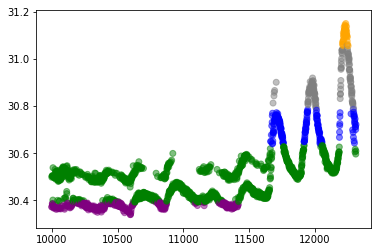

In [46]:
#save the picture
plt.scatter(data_unknow_test.index,data_unknow_test.iloc[:,-2],c = color_list,alpha=0.5)
plt.savefig('./classifi_level.png')

In [59]:
#upload the csv file and picture to the cos bucket
bucket_name2 = buckets[1]
bucket_obj2 = cos.Bucket(bucket_name2)

In [60]:
bucket_obj2.upload_file('classifier_level.csv', 'classifier_level.csv')

In [61]:
bucket_obj2.upload_file('classifi_level.png', 'classifi_level.png')